# What to do? 
1. Data Plotting
2. Generating Samples
3. Regression(Overfitting, underfitting)
4. Data Loading
5. Classification

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn  

## Matplotlib Example

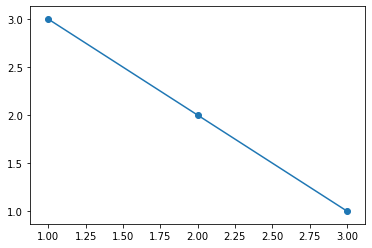

In [12]:
plt.plot([1, 2, 3], [3, 2, 1])
plt.scatter([1, 2, 3], [3, 2, 1])
plt.show()

In [13]:
def draw_plot(X, Y, x_sample, y_sample):
    for i in range(len(X)):
        plt.plot(X[i], Y[i])
    plt.scatter(x_sample, y_sample)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.title('Title')
    plt.show()

## Drawing a function

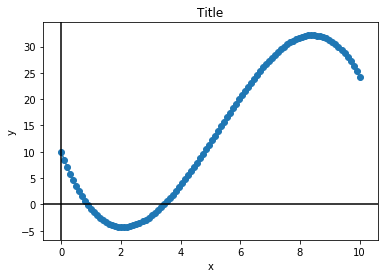

In [33]:
foo = lambda x: -(2/7*x**3 - 9/2*x**2 + 15*x - 10)
x_line = np.linspace(0, 10, 100)

#Quiz: draw the function foo using x_line 
y_line = foo(x_line)
draw_plot([x_line], [y_line], x_line, y_line)



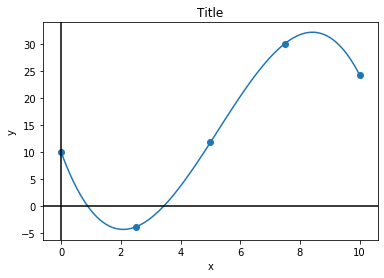

In [34]:
# Quiz: sample 5 points of foo in the domain [0, 10] and visualize with draw_plot 
x_sample = np.linspace(0, 10, 5)
y_sample = foo(x_sample)
draw_plot([x_line], [y_line], x_sample, y_sample)



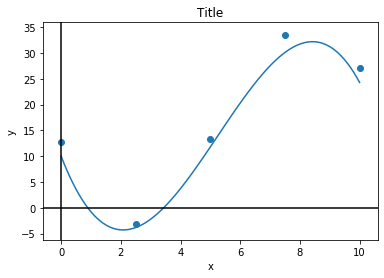

In [51]:
#Quiz: sample 5 points of foo in the domain [0, 10] with Gaussian noise where mu=0, sigma=0.1 and visualize. 
np.random.seed(seed=0)
num_points = 5
x_sample = np.linspace(0, 10, num_points)
y_sample = foo(x_sample)
noise = np.random.normal(0, 1.5, num_points)
y_noised = y_sample + noise
draw_plot([x_line], [y_line], x_sample, y_noised)

## Linear Regression

In [58]:
from sklearn.linear_model import LinearRegression

#define a linear regression model
lr = LinearRegression()

#Train the linear regression model
#lr.fit(x_sample[..., np.newaxis], y_sample) # add a new axis 
#lr.fit(x_sample.reshape((5, -1)), y_sample) # add a new axis
lr.fit(x_sample[:, None], y_sample) # add a new axis 

#coefficient of determination (i.e. R^2, R Squared)
r2 = lr.score(x_sample[:, None], y_sample)
print(f"R^2: {r2}")

R^2: 0.5558706749858193


In [62]:
# predicting a single data point
y_hat = lr.predict(x_sample[[0], None])
print(x_sample[0], y_sample[0], y_hat)

0.0 10.0 [1.96428571]


In [71]:
# Quiz: calculate MSE using x_sample and y_sample and lr.predict()
y_hat = lr.predict(x_sample[:, None])
print(f"Mean Squared Error: {((y_hat - y_sample)**2).mean()}")

Mean Squared Error: 62.42028061224496


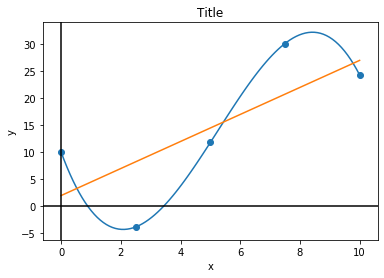

In [74]:
# Quiz: use x_line, lr.predict() and draw_plot to visualize the linear regression mode in comparison with the original function foo. 
draw_plot([x_line, x_line], [y_line, lr.predict(x_line[:, None])], x_sample, y_sample)

# Polynomial Regression

(5, 6)


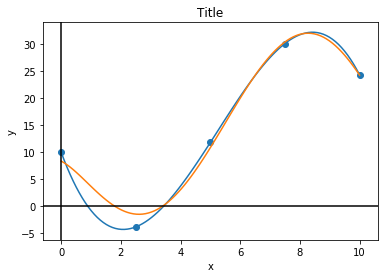

In [86]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

# defining a polynomial feature transformer
poly = PolynomialFeatures(degree=5)

# Transform the original features to polynomial features
x_sample_poly = poly.fit_transform(x_sample[:, None])

#Train a linear regression model using the polynomial features
lr = Ridge(alpha=1.0).fit(x_sample_poly, y_sample)

#Quiz: visualize the polynomial regression model, in comparison foo. 
x_line_poly = poly.fit_transform(x_line[:, None])
y_hat = lr.predict(x_line_poly)
draw_plot([x_line, x_line],[y_line, y_hat], x_sample, y_sample)

#Quiz: what happens if you increase/decrease the degree of the polynomial? 

## Load Iris Dataset 

In [89]:
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)

## Train Test Split

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)

## Classifiers

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC

logistic = LogisticRegression(random_state=1234)
logistic.fit(X_train[:, :2], y_train)

svc = SVC(kernel='poly', degree=2, random_state=1234)
svc.fit(X_train[:, :2], y_train)

tree = DTC(max_depth=8, random_state=1234)
tree.fit(X_train[:, :2], y_train)



DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [98]:
# Quiz: use the model's predict() to calculate the test accuracy
y_hat_logistic = logistic.predict(X_test[:, :2])
y_hat_svc = svc.predict(X_test[:, :2])
y_hat_tree = tree.predict(X_test[:, :2])

lr_accuracy = (y_test == y_hat_logistic).astype("float").mean()
svc_accuracy = (y_test == y_hat_svc).astype("float").mean()
tree_accuracy = (y_test == y_hat_tree).astype("float").mean()

print(f"Logistic regression accuracy: {lr_accuracy}")
print(f"svc accuracy: {svc_accuracy}")
print(f"tree accuracy: {tree_accuracy}")

Logistic regression accuracy: 0.7333333333333333
svc accuracy: 0.7333333333333333
tree accuracy: 0.6333333333333333


In [99]:
# Quiz: Use various model options, features, and the score() fuction to compare performance.

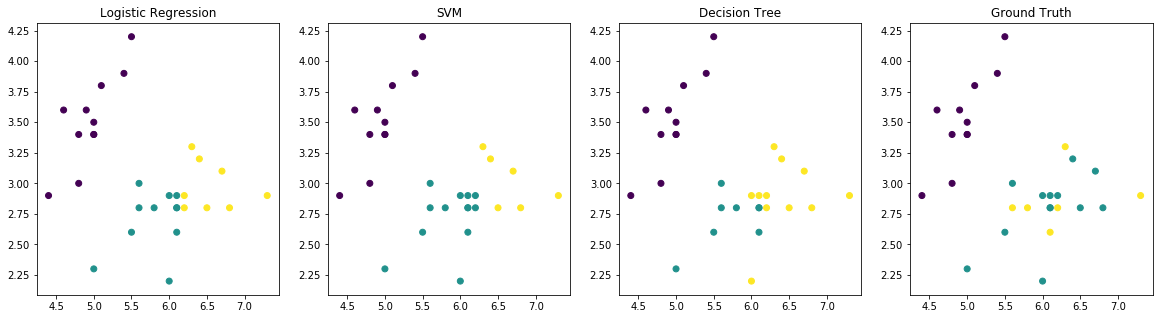

In [109]:
#Quiz: can you draw four scatterplots for each model's predictions and the true labels? 
plt.figure(figsize=(20, 5))

plt.subplot(141)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat_logistic)
plt.title('Logistic Regression')

plt.subplot(142)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat_svc)
plt.title('SVM')

plt.subplot(143)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_hat_tree)
plt.title('Decision Tree')

plt.subplot(144)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title('Ground Truth')

plt.show()